# Naive Bayes Classifier

A simple probabilistic classifier based on Bayes' theorem with a strong/naive independence assumption. There are three types of naive Bayes classifier:

- **Gaussian Naive Bayes**: This classifier assumes that the continuous features follow a normal distribution. It is used when the features are continuous.
- **Multinomial Naive Bayes**: This classifier is used for discrete count data. It assumes that the features follow a multinomial distribution. It is often used for text classification problems.
- **Bernoulli Naive Bayes**: This classifier is similar to the multinomial classifier, but it assumes that the features are binary. It is used for problems where the features are binary (0 or 1), for example when categorical features are one hot encoded.

In [14]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn libraries
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Social Media Dataset

### Read & preprocess data

In [4]:
# import social network dataset
dataset = pd.read_csv('datasets/social_network.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
# split dataset into features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# print first 5 rows of features
print(f'First 5 rows of features: {X[:5]}')

# print first 5 rows of labels
print(f'First 5 rows of labels: {y[:5]}')

# split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# print number of training and test sets
print(f'Number of training sets: {len(X_train)}')
print(f'Number of test sets: {len(X_test)}')


First 5 rows of features: [[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
First 5 rows of labels: [0 0 0 0 0]
Number of training sets: 300
Number of test sets: 100


### Build Naive Bayes model

In [7]:
# build Gaussian Naive Bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# predict test set results
y_pred = gaussian_nb.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


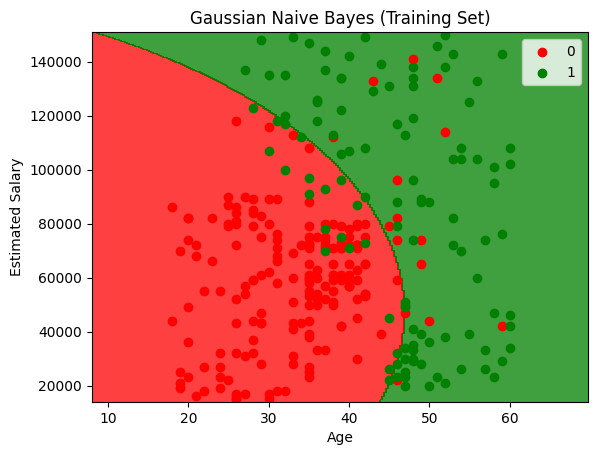

In [9]:
# visualize training set results & decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

plt.contourf(X1, X2, gaussian_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Gaussian Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


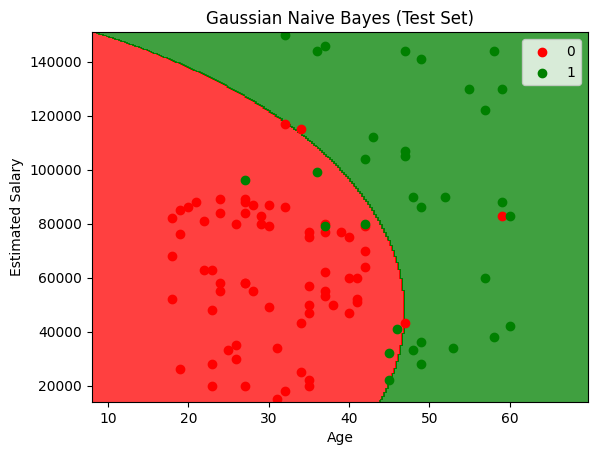

In [10]:
# visualize test set results & decision boundary
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                        np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=10))

plt.contourf(X1, X2, gaussian_nb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Gaussian Naive Bayes (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Spambase Dataset

In [13]:
# import spambase dataset
spam_df = pd.read_csv('datasets/spambase.csv')
spam_df.head()


Number of data points: 4601
Number of features: 58


In [16]:
# print number of data points and features
print(f'Number of data points: {spam_df.shape[0]}')
print(f'Number of features: {spam_df.shape[1]}')

# split dataset into features and labels dataframes
X = spam_df.iloc[:, :-1]
y = spam_df.iloc[:, -1]

Number of data points: 4601
Number of features: 58


c:\Users\IKHSAN-RTX\Envs\deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


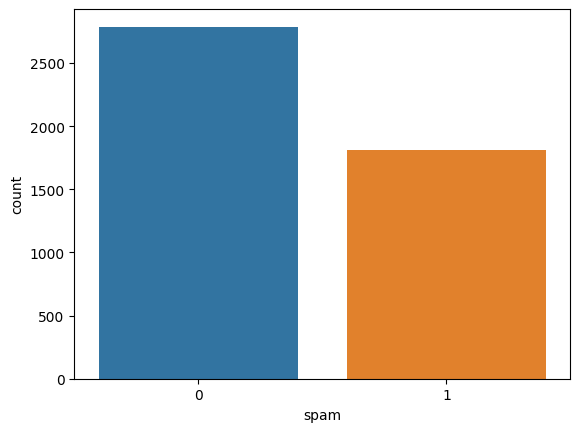

Number of spam: 1813
Number of ham: 2788


In [15]:
# visualize y labels
sns.countplot(y)
plt.show()

# get number of spam and ham using pandas count function
spam = y.value_counts()[1]
ham = y.value_counts()[0]

# print number of spam and ham
print(f'Number of spam: {spam}')
print(f'Number of ham: {ham}')

In [17]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# print number of training and test sets
print(f'Number of training sets: {len(X_train)}')
print(f'Number of test sets: {len(X_test)}')

# built gaussian naive bayes model
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

# predict test set results
y_pred = gaussian_nb.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

Number of training sets: 3450
Number of test sets: 1151
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       691
           1       0.69      0.93      0.79       460

    accuracy                           0.80      1151
   macro avg       0.81      0.82      0.80      1151
weighted avg       0.84      0.80      0.80      1151



In [18]:
# build multinomial naive bayes model
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train, y_train)

# predict test set results
y_pred = multinomial_nb.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.85      0.83       691
           1       0.76      0.73      0.74       460

    accuracy                           0.80      1151
   macro avg       0.79      0.79      0.79      1151
weighted avg       0.80      0.80      0.80      1151



In [19]:
# build bernoulli naive bayes model
bernoulli_nb = BernoulliNB(binarize=True)
bernoulli_nb.fit(X_train, y_train)

# predict test set results
y_pred = bernoulli_nb.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.88      0.88       691
           1       0.82      0.80      0.81       460

    accuracy                           0.85      1151
   macro avg       0.84      0.84      0.84      1151
weighted avg       0.85      0.85      0.85      1151

